**Required Functions for the model**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
import keras
from tensorflow.keras import layers

In [4]:
def scaling(dataset):
  dataset.iloc[:,0]
  del dataset[dataset.columns[0]]

  cols_to_scale = ['weather','PM25_Concentration','wind_direction','temperature','pressure','humidity','PM10_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration']

  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  dataset[cols_to_scale] = scaler.fit_transform(dataset[cols_to_scale])
  return dataset

In [5]:
# Define the window size
def splitting(dataset,win):
  window_size = win

#-------------------------TrainSet---------------------------------

# Initialize empty lists to store X and Y
  X_sequences = []
  Y_values = []

# Iterate through the DataFrame to create sequences
  for i in range(len(dataset) - window_size):
      X_seq = dataset.iloc[i:i+window_size].values
      Y_val = dataset.iloc[i+window_size]['PM25_Concentration']
      X_sequences.append(X_seq)
      Y_values.append(Y_val)

# Convert the lists to NumPy arrays for modeling
  X_train = np.array(X_sequences)
  y_train = np.array(Y_values)

  return X_train,y_train

In [6]:
def create_model(X_train, y_train):

  X_train, Y_train = np.array(X_train), np.array(y_train)

# Reshape the data
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

  model = keras.Sequential()
  model.add(layers.LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))

  model.add(layers.LSTM(50, return_sequences=False))
  model.add(layers.Dense(1,activation='relu'))

# Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model
# Define callbacks for avoiding overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

  # model.summary()

***For Dataset B***

In [7]:
dfB_train = pd.read_csv("/content/drive/MyDrive/Multi-step forecasting in multivariate time series data/B_train.csv")
dfB_train.sample(5)

,Unnamed: 0,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
2651,2014-08-19 11:00:00,0.0,0.784314,0.180328,0.56,0.091667,2.0,0.184343,0.222222,0.081921,0.430518,0.024048,110.0
2927,2014-08-30 23:00:00,5.0,0.607843,0.229508,0.94,0.191667,2.0,0.162879,0.162393,0.075619,0.256131,0.004008,104.0
5046,2014-11-27 06:00:00,1.0,0.235294,0.409836,0.27,0.350000,14.0,0.151515,0.128205,0.018905,0.128065,0.024048,16.0
3182,2014-09-10 14:00:00,0.0,0.764706,0.475410,0.33,0.300000,23.0,0.069444,0.094017,0.056714,0.547684,0.040080,44.0
3686,2014-10-01 14:00:00,4.0,0.431373,0.229508,0.84,0.150000,14.0,0.143939,0.282051,0.063016,0.005450,0.006012,78.0


In [8]:

dfB_train=scaling(dfB_train)

In [76]:
dfB_train

,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
0,0.0,0.62,0.631579,0.56,0.183333,0.541667,0.227885,0.221121,0.096774,0.373425,0.075269,0.125209
1,0.0,0.58,0.631579,0.64,0.175000,0.541667,0.256410,0.250000,0.107527,0.290411,0.075269,0.158598
2,0.0,0.58,0.631579,0.70,0.133333,0.541667,0.259615,0.241379,0.096774,0.263014,0.096774,0.171953
3,0.0,0.56,0.631579,0.74,0.141667,0.541667,0.258013,0.181034,0.064516,0.284932,0.096774,0.173623
4,0.0,0.56,0.631579,0.75,0.108333,0.041667,0.246795,0.181034,0.064516,0.180822,0.091398,0.181970
...,...,...,...,...,...,...,...,...,...,...,...,...
7002,0.0,0.28,0.394737,0.52,0.275000,0.583333,0.047756,0.084914,0.021505,0.172877,0.001075,0.026711
7003,0.0,0.28,0.447368,0.64,0.266667,0.583333,0.056250,0.129310,0.032258,0.140822,0.004301,0.021703
7004,0.0,0.28,0.447368,0.64,0.266667,0.583333,0.061699,0.138793,0.043011,0.133425,0.036559,0.030050
7005,0.0,0.24,0.447368,0.71,0.325000,0.583333,0.059295,0.112931,0.032258,0.149041,0.016129,0.023372


In [9]:
win=1 #step size
XB1_train,yB1_train=splitting(dfB_train,win)
win=7 #step size
XB7_train,yB7_train=splitting(dfB_train,win)
win=14 #step size
XB14_train,yB14_train=splitting(dfB_train,win)
win=30 #step size
XB30_train,yB30_train=splitting(dfB_train,win)
win=60 #step size
XB60_train,yB60_train=splitting(dfB_train,win)

In [10]:
modelB1=create_model(XB1_train,yB1_train)
modelB7=create_model(XB7_train,yB7_train)
modelB14=create_model(XB14_train,yB14_train)
modelB30=create_model(XB30_train,yB30_train)
modelB60=create_model(XB60_train,yB60_train)


In [11]:
# Train the model
epochs = 10  # Adjust as needed
batch_size = 32  # Adjust as needed
modelB1.fit(XB1_train, yB1_train, epochs=epochs, batch_size=batch_size)

modelB7.fit(XB7_train, yB7_train, epochs=epochs, batch_size=batch_size)
modelB14.fit(XB14_train, yB14_train, epochs=epochs, batch_size=batch_size)
modelB30.fit(XB30_train, yB30_train, epochs=epochs, batch_size=batch_size)
modelB60.fit(XB60_train, yB60_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
219/219 [==============================] - 11s 8ms/step - loss: 0.0059
Epoch 2/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0016
Epoch 3/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0013
Epoch 4/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 5/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 8/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 9/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 10/10
219/219 [==============================] - 2s 7ms/step - loss: 0.0012
Epoch 1/10
219/219 [==============================] - 5s 6ms/step - loss: 0.0051
Epoch 2/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0023
Epoch 3/10
219/219 [======

In [12]:
dfB_test = pd.read_csv("/content/drive/MyDrive/Multi-step forecasting in multivariate time series data/B_test.csv")
dfB_test.sample(5)

,Unnamed: 0,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
1708,2015-04-29 03:00:00,0.0,0.456863,0.213115,0.82,0.062500,13.0,0.148990,0.329060,0.107127,0.032698,0.024048,112.0
1161,2015-04-06 08:00:00,1.0,0.254902,0.508197,0.22,0.450000,14.0,0.029040,0.068376,0.012603,0.179837,0.004008,22.0
1089,2015-04-03 08:00:00,0.0,0.313725,0.196721,0.73,0.191667,14.0,0.027778,0.235043,0.037810,0.141689,0.010020,22.0
259,2015-02-27 18:00:00,2.0,0.215686,0.540984,0.37,0.100000,23.0,0.023737,0.166239,0.044111,0.105177,0.027054,15.0
1541,2015-04-22 04:00:00,0.0,0.372549,0.098361,0.73,0.069444,13.0,0.117424,0.487179,0.075619,0.046322,0.020040,64.0


In [13]:
dfB_test=scaling(dfB_test)

In [14]:
XB1_test,yB1_test=splitting(dfB_test,1)
XB7_test,yB7_test=splitting(dfB_test,7)
XB14_test,yB14_test=splitting(dfB_test,14)
XB30_test,yB30_test=splitting(dfB_test,30)
XB60_test,yB60_test=splitting(dfB_test,60)

In [15]:
y_predB1=modelB1.predict(XB1_test)
y_predB7=modelB7.predict(XB7_test)
y_predB14=modelB14.predict(XB14_test)
y_predB30=modelB30.predict(XB30_test)
y_predB60=modelB60.predict(XB60_test)

53/53 [==============================] - 2s 6ms/step


In [21]:
y_predB1.flatten()
yB1_test.flatten()

(1728,)

In [35]:
def graph(y1,y2):
  plt.figure(figsize=(15, 3))
  plt.plot(y1, label="Predicted PM2.5 Values", alpha=0.9)
  plt.plot(y2, label="Actual PM2.5 Values", alpha=0.8)
  plt.xlabel('Time Step')
  plt.ylabel('Normalized PM2.5 Concentration')
  plt.legend()
  plt.show()

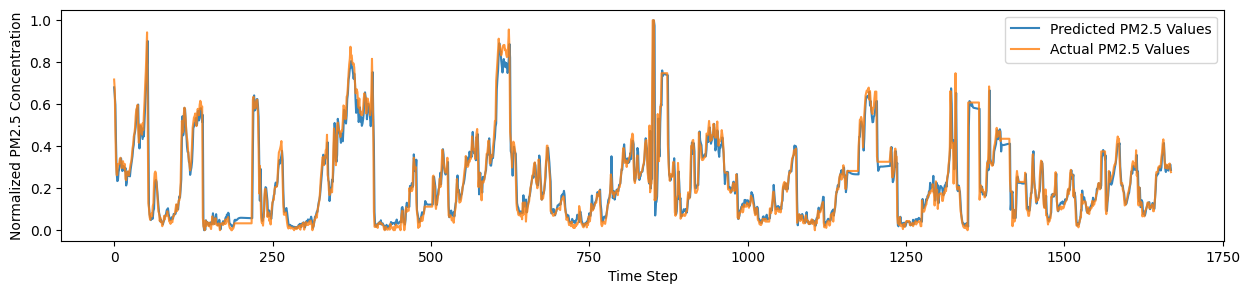

In [41]:
graph(y_predB60.flatten(),yB60_test.flatten())

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mseB1=mean_squared_error(yB1_test,y_predB1)
maeB1=mean_absolute_error(yB1_test,y_predB1)
print(f"City B - Step {1} - MSE: {mseB1}, MAE: {maeB1}")
mseB7=mean_squared_error(yB7_test,y_predB7)
maeB7=mean_absolute_error(yB7_test,y_predB7)
print(f"City B - Step {7} - MSE: {mseB7}, MAE: {maeB7}")
mseB14=mean_squared_error(yB14_test,y_predB14)
maeB14=mean_absolute_error(yB14_test,y_predB14)
print(f"City B - Step {14} - MSE: {mseB14}, MAE: {maeB14}")
mseB30=mean_squared_error(yB30_test,y_predB30)
maeB30=mean_absolute_error(yB30_test,y_predB30)
print(f"City B - Step {30} - MSE: {mseB30}, MAE: {maeB30}")
mseB60=mean_squared_error(yB60_test,y_predB60)
maeB60=mean_absolute_error(yB60_test,y_predB60)
print(f"City B - Step {60} - MSE: {mseB60}, MAE: {maeB60}")

City B - Step 1 - MSE: 0.004081966881978701, MAE: 0.03366737836538024
City B - Step 7 - MSE: 0.004015563034022686, MAE: 0.033824589844970145
City B - Step 14 - MSE: 0.004195954490399852, MAE: 0.036665775212276826
City B - Step 30 - MSE: 0.004884276527181504, MAE: 0.04335303585887004
City B - Step 60 - MSE: 0.003781090686240036, MAE: 0.03292151882265501


In [43]:
# saving the model named as modelB
modelB1.save('modelB1.h5')
modelB7.save('modelB7.h5')
modelB14.save('modelB14.h5')
modelB30.save('modelB30.h5')
modelB60.save('modelB60.h5')

In [44]:
# loading the model
loaded_modelB1 = tf.keras.models.load_model('modelB1.h5')
loaded_modelB7 = tf.keras.models.load_model('modelB7.h5')
loaded_modelB14 = tf.keras.models.load_model('modelB14.h5')
loaded_modelB30 = tf.keras.models.load_model('modelB30.h5')
loaded_modelB60 = tf.keras.models.load_model('modelB60.h5')

In [45]:
y_predoo=loaded_modelB1.predict(XB1_test)

54/54 [==============================] - 1s 3ms/step


In [46]:
from sklearn.metrics import mean_squared_error
mseB=mean_squared_error(yB1_test,y_predB1)
mseB

0.004081966881978701

**For Dataset G**

In [47]:
dfG_train = pd.read_csv("/content/drive/MyDrive/Multi-step forecasting in multivariate time series data/G_train.csv")
dfG_train.sample(5)

,Unnamed: 0,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
319,2014-08-13 23:00:00,6.0,0.725490,0.344262,1.00,0.083333,14.0,0.065657,0.162393,0.080156,0.029973,0.018036,40.0
5185,2015-03-04 17:00:00,4.0,0.431373,0.508197,0.96,0.183333,14.0,0.017677,0.089744,0.047262,0.106267,0.016032,12.0
2284,2014-11-03 20:00:00,1.0,0.627451,0.557377,0.51,0.116667,4.0,0.097222,0.170940,0.011595,0.269755,0.076152,49.0
1471,2014-09-30 23:00:00,1.0,0.764706,0.442623,0.76,0.158333,24.0,0.101010,0.076923,0.054446,0.209809,0.032064,55.0
2116,2014-10-27 20:00:00,1.0,0.823529,0.540984,0.44,0.166667,14.0,0.137626,0.363248,0.059298,0.158038,0.020040,69.0


In [48]:
dfG_train=scaling(dfG_train)

In [49]:
win=1 #step size
XG1_train,yG1_train=splitting(dfG_train,win)
win=7 #step size
XG7_train,yG7_train=splitting(dfG_train,win)
win=14 #step size
XG14_train,yG14_train=splitting(dfG_train,win)
win=30 #step size
XG30_train,yG30_train=splitting(dfG_train,win)
win=60 #step size
XG60_train,yG60_train=splitting(dfG_train,win)

In [50]:
modelG1=create_model(XG1_train,yG1_train)
modelG7=create_model(XG7_train,yG7_train)
modelG14=create_model(XG14_train,yG14_train)
modelG30=create_model(XG30_train,yG30_train)
modelG60=create_model(XG60_train,yG60_train)

In [51]:
# Train the model
epochs = 10  # Adjust as needed
batch_size = 32  # Adjust as needed
modelG1.fit(XG1_train, yG1_train, epochs=epochs, batch_size=batch_size)

modelG7.fit(XG7_train, yG7_train, epochs=epochs, batch_size=batch_size)
modelG14.fit(XG14_train, yG14_train, epochs=epochs, batch_size=batch_size)
modelG30.fit(XG30_train, yG30_train, epochs=epochs, batch_size=batch_size)
modelG60.fit(XG60_train, yG60_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
164/164 [==============================] - 5s 5ms/step - loss: 0.0082
Epoch 2/10
164/164 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 3/10
164/164 [==============================] - 1s 7ms/step - loss: 0.0013
Epoch 4/10
164/164 [==============================] - 1s 7ms/step - loss: 0.0013
Epoch 5/10
164/164 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 6/10
164/164 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 7/10
164/164 [==============================] - 1s 6ms/step - loss: 0.0012
Epoch 8/10
164/164 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 9/10
164/164 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 10/10
164/164 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 1/10
164/164 [==============================] - 4s 6ms/step - loss: 0.0053
Epoch 2/10
164/164 [==============================] - 1s 6ms/step - loss: 0.0026
Epoch 3/10
164/164 [=======

In [52]:
dfG_test = pd.read_csv("/content/drive/MyDrive/Multi-step forecasting in multivariate time series data/G_test.csv")
dfG_test.sample(5)

,Unnamed: 0,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
669,2015-04-04 04:00:00,2.0,0.705882,0.360656,0.89,0.196759,13.0,0.027778,0.111111,0.028357,0.059946,0.022044,12.0
348,2015-03-21 19:00:00,2.0,0.647059,0.524590,0.75,0.069444,4.0,0.082071,0.145299,0.066167,0.234332,0.040080,40.0
1202,2015-04-26 09:00:00,4.0,0.627451,0.557377,1.00,0.069444,13.0,0.077020,0.222222,0.069948,0.079019,0.048096,54.0
872,2015-04-12 15:00:00,1.0,0.705882,0.540984,0.41,0.358796,4.0,0.058081,0.055556,0.049783,0.405995,0.050100,30.0
165,2015-03-14 04:00:00,1.0,0.529412,0.540984,0.94,0.069444,1.0,0.066919,0.222222,0.050413,0.000000,0.034068,38.0


In [53]:
dfG_test=scaling(dfG_test)

In [54]:
XG1_test,yG1_test=splitting(dfG_test,1)
XG7_test,yG7_test=splitting(dfG_test,7)
XG14_test,yG14_test=splitting(dfG_test,14)
XG30_test,yG30_test=splitting(dfG_test,30)
XG60_test,yG60_test=splitting(dfG_test,60)

In [55]:
y_predG1=modelG1.predict(XG1_test)
y_predG7=modelG7.predict(XG7_test)
y_predG14=modelG14.predict(XG14_test)
y_predG30=modelG30.predict(XG30_test)
y_predG60=modelG60.predict(XG60_test)

39/39 [==============================] - 1s 5ms/step


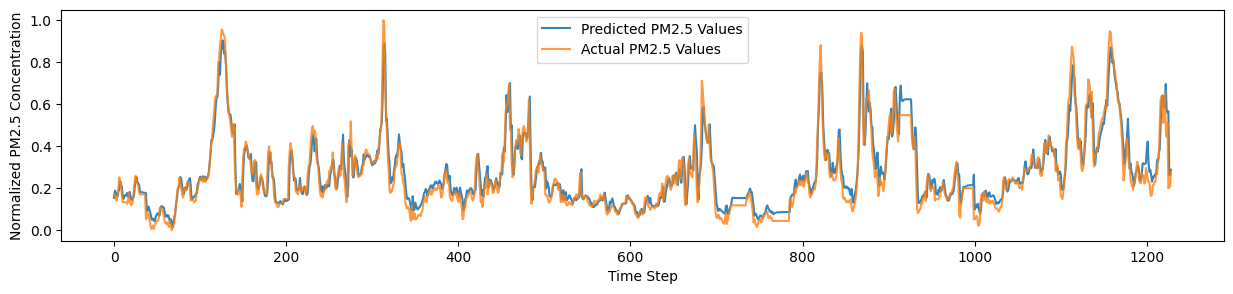

In [60]:
graph(y_predG60.flatten(),yG60_test.flatten())

In [61]:
mseG1=mean_squared_error(yG1_test,y_predG1)
maeG1=mean_absolute_error(yG1_test,y_predG1)
print(f"City G - Step {1} - MSE: {mseG1}, MAE: {maeG1}")
mseG7=mean_squared_error(yG7_test,y_predG7)
maeG7=mean_absolute_error(yG7_test,y_predG7)
print(f"City G - Step {7} - MSE: {mseG7}, MAE: {maeG7}")
mseG14=mean_squared_error(yG14_test,y_predG14)
maeG14=mean_absolute_error(yG14_test,y_predG14)
print(f"City G - Step {14} - MSE: {mseG14}, MAE: {maeG14}")
mseG30=mean_squared_error(yG30_test,y_predG30)
maeG30=mean_absolute_error(yG30_test,y_predG30)
print(f"City G - Step {30} - MSE: {mseG30}, MAE: {maeG30}")
mseG60=mean_squared_error(yG60_test,y_predG60)
maeG60=mean_absolute_error(yG60_test,y_predG60)
print(f"City G - Step {60} - MSE: {mseG60}, MAE: {maeG60}")

City G - Step 1 - MSE: 0.00264897145710577, MAE: 0.033984541683615796
City G - Step 7 - MSE: 0.004269494899842432, MAE: 0.04777897958762633
City G - Step 14 - MSE: 0.00262772932995816, MAE: 0.03387479070069765
City G - Step 30 - MSE: 0.0024952065849748865, MAE: 0.032857092550519655
City G - Step 60 - MSE: 0.0029781298507019554, MAE: 0.038870367134921785


In [62]:
# saving the model
modelG1.save('modelG1.h5')
modelG7.save('modelG7.h5')
modelG14.save('modelG14.h5')
modelG30.save('modelG30.h5')
modelG60.save('modelG60.h5')

In [63]:
# loading the model
loaded_modelG1 = tf.keras.models.load_model('modelG1.h5')
loaded_modelG7 = tf.keras.models.load_model('modelG7.h5')
loaded_modelG14 = tf.keras.models.load_model('modelG14.h5')
loaded_modelG30 = tf.keras.models.load_model('modelG30.h5')
loaded_modelG60 = tf.keras.models.load_model('modelG60.h5')

In [64]:
y_predoo=loaded_modelG1.predict(XG1_test)

41/41 [==============================] - 1s 2ms/step


In [65]:
from sklearn.metrics import mean_squared_error
mseG1=mean_squared_error(yG1_test,y_predG1)
mseG1

0.00264897145710577

**For Dataset S**

In [66]:
dfS_train = pd.read_csv("/content/drive/MyDrive/Multi-step forecasting in multivariate time series data/S_train.csv")
dfS_train.sample(5)

,Unnamed: 0,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
2152,2015-01-27 03:00:00,1.0,0.562745,0.554098,0.87,0.016204,1.0,0.053030,0.072650,0.059235,0.209809,0.004008,38.0
553,2014-11-21 12:00:00,1.0,0.713725,0.542623,0.54,0.034722,4.0,0.107323,0.136752,0.077321,0.258856,0.010020,37.0
424,2014-11-16 03:00:00,1.0,0.594118,0.555738,0.91,0.011574,4.0,0.113636,0.414530,0.086521,0.103542,0.024048,42.0
1667,2015-01-06 22:00:00,1.0,0.609804,0.504918,0.88,0.009259,13.0,0.190657,0.405983,0.092633,0.114441,0.044088,50.0
134,2014-11-04 01:00:00,2.0,0.635294,0.540984,0.63,0.004630,24.0,0.087121,0.294872,0.088096,0.136240,0.032064,53.0


In [67]:
dfS_train=scaling(dfS_train)

In [89]:
win=1 #step size
XS1_train,yS1_train=splitting(dfS_train,win)
win=7 #step size
XS7_train,yS7_train=splitting(dfS_train,win)
win=14 #step size
XS14_train,yS14_train=splitting(dfS_train,win)
win=30 #step size
XS30_train,yS30_train=splitting(dfS_train,win)
win=60 #step size
XS60_train,yS60_train=splitting(dfS_train,win)

In [90]:
modelS1=create_model(XS1_train,yS1_train)
modelS7=create_model(XS7_train,yS7_train)
modelS14=create_model(XS14_train,yS14_train)
modelS30=create_model(XS30_train,yS30_train)
modelS60=create_model(XS60_train,yS60_train)

In [91]:
# Train the model
epochs = 10  # Adjust as needed
batch_size = 32  # Adjust as needed
modelS1.fit(XS1_train, yS1_train, epochs=epochs, batch_size=batch_size)

modelS7.fit(XS7_train, yS7_train, epochs=epochs, batch_size=batch_size)
modelS14.fit(XS14_train, yS14_train, epochs=epochs, batch_size=batch_size)
modelS30.fit(XS30_train, yS30_train, epochs=epochs, batch_size=batch_size)
modelS60.fit(XS60_train, yS60_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
111/111 [==============================] - 6s 6ms/step - loss: 0.0158
Epoch 2/10
111/111 [==============================] - 1s 5ms/step - loss: 0.0032
Epoch 3/10
111/111 [==============================] - 1s 6ms/step - loss: 0.0017
Epoch 4/10
111/111 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 5/10
111/111 [==============================] - 1s 6ms/step - loss: 9.2831e-04
Epoch 6/10
111/111 [==============================] - 1s 5ms/step - loss: 8.8544e-04
Epoch 7/10
111/111 [==============================] - 1s 5ms/step - loss: 9.0802e-04
Epoch 8/10
111/111 [==============================] - 1s 5ms/step - loss: 8.5938e-04
Epoch 9/10
111/111 [==============================] - 1s 5ms/step - loss: 8.5869e-04
Epoch 10/10
111/111 [==============================] - 1s 5ms/step - loss: 8.9760e-04
Epoch 1/10
110/110 [==============================] - 6s 8ms/step - loss: 0.0832
Epoch 2/10
110/110 [==============================] - 1s 8ms/step - loss: 0.0832
Epo

In [92]:
dfS_test = pd.read_csv("/content/drive/MyDrive/Multi-step forecasting in multivariate time series data/S_test.csv")
dfS_test.sample(5)

,Unnamed: 0,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
485,2015-04-14 11:00:00,0.0,0.703922,0.598361,0.22,0.020833,1.0,0.101010,0.123932,0.047262,0.310627,0.014028,22.0
538,2015-04-16 16:00:00,1.0,0.749020,0.465574,0.56,0.032407,24.0,0.098485,0.205128,0.052303,0.365123,0.050100,25.0
438,2015-04-12 12:00:00,1.0,0.652941,0.590164,0.65,0.023148,14.0,0.056818,0.094017,0.070578,0.226158,0.012024,27.0
506,2015-04-15 08:00:00,1.0,0.607843,0.537705,0.64,0.013889,13.0,0.104798,0.414530,0.065537,0.089918,0.014028,44.0
832,2015-04-28 22:00:00,2.0,0.727451,0.440984,0.74,0.016204,3.0,0.077020,0.158120,0.069318,0.079019,0.018036,15.0


In [93]:
dfS_test=scaling(dfS_test)

In [94]:
XS1_test,yS1_test=splitting(dfS_test,1)
XS7_test,yS7_test=splitting(dfS_test,7)
XS14_test,yS14_test=splitting(dfS_test,14)
XS30_test,yS30_test=splitting(dfS_test,30)
XS60_test,yS60_test=splitting(dfS_test,60)

In [95]:
y_predS1=modelS1.predict(XS1_test)
y_predS7=modelS7.predict(XS7_test)
y_predS14=modelS14.predict(XS14_test)
y_predS30=modelS30.predict(XS30_test)
y_predS60=modelS60.predict(XS60_test)

25/25 [==============================] - 1s 6ms/step


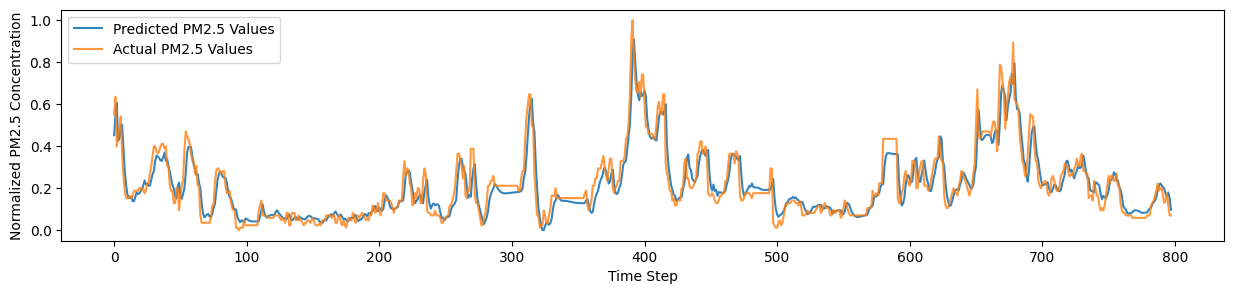

In [99]:
graph(y_predS60.flatten(),yS60_test.flatten())

In [100]:
mseS1=mean_squared_error(yS1_test,y_predS1)
maeS1=mean_absolute_error(yS1_test,y_predS1)
print(f"City S - Step {1} - MSE: {mseS1}, MAE: {maeS1}")
mseS7=mean_squared_error(yS7_test,y_predS7)
maeS7=mean_absolute_error(yS7_test,y_predS7)
print(f"City S - Step {7} - MSE: {mseS7}, MAE: {maeS7}")
mseS14=mean_squared_error(yS14_test,y_predS14)
maeS14=mean_absolute_error(yS14_test,y_predS14)
print(f"City S - Step {14} - MSE: {mseS14}, MAE: {maeS14}")
mseS30=mean_squared_error(yS30_test,y_predS30)
maeS30=mean_absolute_error(yS30_test,y_predS30)
print(f"City S - Step {30} - MSE: {mseS30}, MAE: {maeS30}")
mseS60=mean_squared_error(yS60_test,y_predS60)
maeS60=mean_absolute_error(yS60_test,y_predS60)
print(f"City S - Step {60} - MSE: {mseS60}, MAE: {maeS60}")

City S - Step 1 - MSE: 0.0028685217888831413, MAE: 0.03604553148950273
City S - Step 7 - MSE: 0.07705504210393634, MAE: 0.22411004354738367
City S - Step 14 - MSE: 0.0039585750797148, MAE: 0.04561040892253014
City S - Step 30 - MSE: 0.0741851935651176, MAE: 0.21859411413334873
City S - Step 60 - MSE: 0.0037165862986460376, MAE: 0.04318148770621746


In [101]:
# saving the model
modelS1.save('modelS1.h5')
modelS7.save('modelS7.h5')
modelS14.save('modelS14.h5')
modelS30.save('modelS30.h5')
modelS60.save('modelS60.h5')

In [102]:
# loading the model
loaded_modelS1 = tf.keras.models.load_model('modelS1.h5')
loaded_modelS7 = tf.keras.models.load_model('modelS7.h5')
loaded_modelS14 = tf.keras.models.load_model('modelS14.h5')
loaded_modelS30 = tf.keras.models.load_model('modelS30.h5')
loaded_modelS60 = tf.keras.models.load_model('modelS60.h5')

In [103]:
y_predoo=loaded_modelS1.predict(XS1_test)

27/27 [==============================] - 1s 4ms/step


In [104]:
from sklearn.metrics import mean_squared_error
mseS=mean_squared_error(yS1_test,y_predoo)
mseS

0.0028685217888831413

**For Dataset T**

In [105]:
dfT_train = pd.read_csv("/content/drive/MyDrive/Multi-step forecasting in multivariate time series data/T_train.csv")
dfT_train.sample(5)

,Unnamed: 0,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
6825,2015-02-09 09:00:00,0.0,0.196078,0.836066,0.25,0.200000,24.0,0.141414,0.247863,0.114878,0.010899,0.132265,58.0
5917,2015-01-02 13:00:00,0.0,0.313725,0.819672,0.16,0.066667,14.0,0.044192,0.102564,0.069381,0.111717,0.070140,33.0
3404,2014-09-19 20:00:00,4.0,0.607843,0.508197,0.75,0.141667,13.0,0.106061,0.111111,0.091751,0.196185,0.036072,47.0
5036,2014-11-26 20:00:00,1.0,0.313725,0.655738,0.95,0.066667,4.0,0.580808,0.474359,0.245762,0.010899,0.024048,396.0
6835,2015-02-09 19:00:00,0.0,0.235294,0.721311,0.31,0.050000,23.0,0.276515,0.273504,0.132018,0.040872,0.136273,112.0


In [106]:
dfT_train=scaling(dfT_train)

In [107]:
win=1 #step size
XT1_train,yT1_train=splitting(dfT_train,win)
win=7 #step size
XT7_train,yT7_train=splitting(dfT_train,win)
win=14 #step size
XT14_train,yT14_train=splitting(dfT_train,win)
win=30 #step size
XT30_train,yT30_train=splitting(dfT_train,win)
win=60 #step size
XT60_train,yT60_train=splitting(dfT_train,win)

In [108]:
modelT1=create_model(XT1_train,yT1_train)
modelT7=create_model(XT7_train,yT7_train)
modelT14=create_model(XT14_train,yT14_train)
modelT30=create_model(XT30_train,yT30_train)
modelT60=create_model(XT60_train,yT60_train)

In [109]:
# Train the model
epochs = 10  # Adjust as needed
batch_size = 32  # Adjust as needed
modelT1.fit(XT1_train, yT1_train, epochs=epochs, batch_size=batch_size)

modelT7.fit(XT7_train, yT7_train, epochs=epochs, batch_size=batch_size)
modelT14.fit(XT14_train, yT14_train, epochs=epochs, batch_size=batch_size)
modelT30.fit(XT30_train, yT30_train, epochs=epochs, batch_size=batch_size)
modelT60.fit(XT60_train, yT60_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
219/219 [==============================] - 5s 5ms/step - loss: 0.0059
Epoch 2/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0015
Epoch 3/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 4/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 5/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 8/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0012
Epoch 9/10
219/219 [==============================] - 2s 7ms/step - loss: 0.0011
Epoch 10/10
219/219 [==============================] - 2s 11ms/step - loss: 0.0011
Epoch 1/10
219/219 [==============================] - 5s 6ms/step - loss: 0.0044
Epoch 2/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0024
Epoch 3/10
219/219 [======

In [110]:
dfT_test = pd.read_csv("/content/drive/MyDrive/Multi-step forecasting in multivariate time series data/T_test.csv")
dfT_test.sample(5)

,Unnamed: 0,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
774,2015-03-21 05:00:00,0.0,0.352941,0.606557,0.20,0.116667,24.0,0.448232,0.273504,0.079274,0.027248,0.046092,87.0
380,2015-03-04 19:00:00,0.0,0.254902,0.803279,0.17,0.066667,23.0,0.113636,0.059829,0.082299,0.079019,0.018036,22.0
1494,2015-04-20 05:00:00,0.0,0.372549,0.606557,0.76,0.100000,23.0,0.286616,0.072650,0.039763,0.070845,0.010020,52.0
359,2015-03-03 22:00:00,0.0,0.235294,0.770492,0.17,0.175000,24.0,0.181818,0.162393,0.081417,0.027248,0.042084,21.0
797,2015-03-22 04:00:00,1.0,0.431373,0.704918,0.13,0.133333,14.0,0.272727,0.350427,0.101519,0.010899,0.056112,82.0


In [111]:
dfT_test=scaling(dfT_test)

In [112]:
XT1_test,yT1_test=splitting(dfT_test,1)
XT7_test,yT7_test=splitting(dfT_test,7)
XT14_test,yT14_test=splitting(dfT_test,14)
XT30_test,yT30_test=splitting(dfT_test,30)
XT60_test,yT60_test=splitting(dfT_test,60)

In [113]:
y_predT1=modelT1.predict(XT1_test)
y_predT7=modelT7.predict(XT7_test)
y_predT14=modelT14.predict(XT14_test)
y_predT30=modelT30.predict(XT30_test)
y_predT60=modelT60.predict(XT60_test)

53/53 [==============================] - 5s 7ms/step


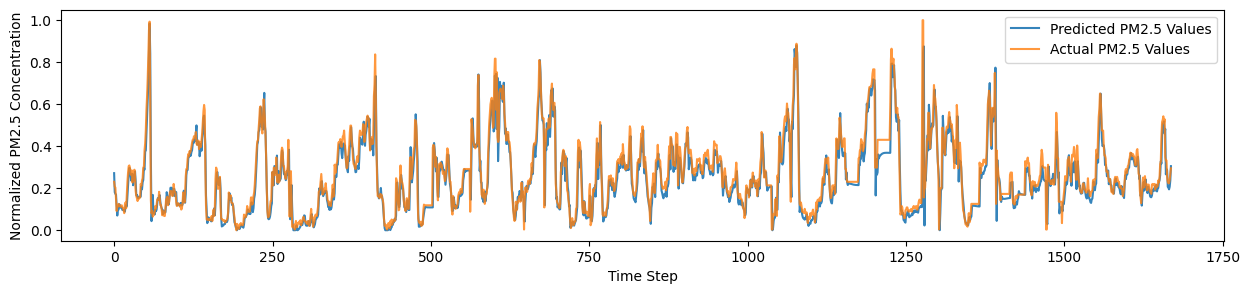

In [118]:
graph(y_predT60.flatten(),yT60_test.flatten())

In [119]:
mseT1=mean_squared_error(yT1_test,y_predT1)
maeT1=mean_absolute_error(yT1_test,y_predT1)
print(f"City T - Step {1} - MSE: {mseT1}, MAE: {maeT1}")
mseT7=mean_squared_error(yT7_test,y_predT7)
maeT7=mean_absolute_error(yT7_test,y_predT7)
print(f"City T - Step {7} - MSE: {mseT7}, MAE: {maeT7}")
mseT14=mean_squared_error(yT14_test,y_predT14)
maeT14=mean_absolute_error(yT14_test,y_predT14)
print(f"City T - Step {14} - MSE: {mseT14}, MAE: {maeT14}")
mseT30=mean_squared_error(yT30_test,y_predT30)
maeT30=mean_absolute_error(yT30_test,y_predT30)
print(f"City T - Step {30} - MSE: {mseT30}, MAE: {maeT30}")
mseT60=mean_squared_error(yT60_test,y_predT60)
maeT60=mean_absolute_error(yT60_test,y_predT60)
print(f"City T - Step {60} - MSE: {mseT60}, MAE: {maeT60}")

City T - Step 1 - MSE: 0.005338279096765976, MAE: 0.04743675652399609
City T - Step 7 - MSE: 0.004494600704651444, MAE: 0.04301906802743645
City T - Step 14 - MSE: 0.004697994411001716, MAE: 0.04412171681035021
City T - Step 30 - MSE: 0.004386086319657421, MAE: 0.04058068590781181
City T - Step 60 - MSE: 0.003848873809348781, MAE: 0.03906945613483316


In [120]:
# saving the model
modelT1.save('modelT1.h5')
modelT7.save('modelT7.h5')
modelT14.save('modelT14.h5')
modelT30.save('modelT30.h5')
modelT60.save('modelT60.h5')

In [121]:
# loading the model
loaded_modelT1 = tf.keras.models.load_model('modelT1.h5')
loaded_modelT7 = tf.keras.models.load_model('modelT7.h5')
loaded_modelT14 = tf.keras.models.load_model('modelT14.h5')
loaded_modelT30 = tf.keras.models.load_model('modelT30.h5')
loaded_modelT60 = tf.keras.models.load_model('modelT60.h5')

In [122]:
y_predoo=loaded_modelT1.predict(XT1_test)

54/54 [==============================] - 1s 3ms/step


In [123]:
from sklearn.metrics import mean_squared_error
mseT=mean_squared_error(yT1_test,y_predoo)
mseT

0.005338279096765976